# 1. Introducción

En el siguiente ejercicio se realizará la **rotación a 90°** de una imagen.

El algoritmo está basado en la **matriz de rotación** ampliamente difundida en plataformas en materia de álgebra como Wolfram [1]:

<center>
$$
\left(\begin{array}{cc} 
\cos\alpha & -\sin\alpha\\
\sin\alpha & \cos\alpha
\end{array}\right)
$$ 
</center>

La idea principal es mostrar la perfomance del funcionamiento de **estructuras de dos dimensiones** para gran cantidad de elementos.

Se utilizará exclusivamente Python [2] con bibliotecas estándares para el manejo de imágenes en la plataforma Colab [3][4].

---
# 2. Armado del ambiente


### Importación de **bibliotecas**


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image 
import numpy
from datetime import datetime

### Obtenemos la imagen

In [7]:
#@title ### 2.1. Parámetros de ejecución
#@markdown ---
#@markdown URL de la imagen:
url_imagen = "https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/pia22207-16.jpg" #@param {type:"string"}
#@markdown ---

# Validamos la URL de la imagen
if url_imagen == "":
  raise TypeError("Se debe ingresar la URL de la imagen.")

# Obtenemos la imagen desde internet
!wget {url_imagen} -O imagen.jpg

--2020-12-02 22:09:05--  https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/pia22207-16.jpg
Resolving www.nasa.gov (www.nasa.gov)... 13.227.209.21, 13.227.209.27, 13.227.209.128, ...
Connecting to www.nasa.gov (www.nasa.gov)|13.227.209.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139401 (136K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 136.13K  --.-KB/s    in 0.009s  

2020-12-02 22:09:06 (14.2 MB/s) - ‘imagen.jpg’ saved [139401/139401]



# 3. Desarrollo

Tiempo de conversión de imagen:  864.263 [ms]
Tiempo Total: 885.935 [ms]


Imagen orginal: imagen.jpg - [1041, 586]



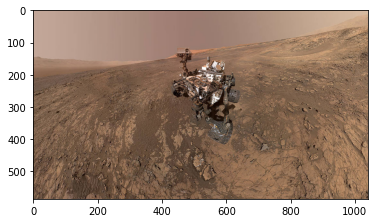

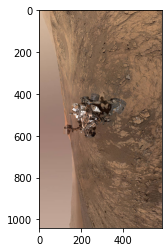

In [8]:
# Definición de función que transforma el tiempo en milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

# El ejercicio podría fallar si no se importaron los recursos necesarios o no se cargó una imagen
# Es por eso que envolvemos el código en un bloque try, de esta forma
# se le indica al usuario cómo proceder
try:
  # Capturamos el tiempo inicial
  tiempo_total = datetime.now()

  # Indicamos la imagen a cargar y creamos el objeto
  img_nombre = 'imagen.jpg'
  image = Image.open(img_nombre) 

  # Obtenemos las proporciones de la imagen 
  img_ancho, img_alto = image.size 

  # Pasamos la imagen original comprimida en JPEG/PNG a array
  img_cpu = numpy.asarray(image)

  # Creamos una nueva imagen con las dimensiones invertidas
  image_rot = Image.new(mode = "RGB", size = (img_alto, img_ancho))
  img_cpu_rot = numpy.asarray(image_rot).copy()

  # Capturamos el tiempo inicial de la rotación
  tiempo_img = datetime.now()

  # -- Rotamos la imagen --
  # - La imagen original será recorrida desde la esquina superior izquierda hacia abajo
  #   y luego hacia el ancho, volviendo a repetir el ciclo.
  # - La imagen rotada se irá armando desde la esquina inferior izquierda hacia arriba
  #   y luego hacia el nuevo ancho, volviendo a repetir el ciclo.
  for x  in range(0, img_ancho):
    for y in range(0, img_alto):
      img_cpu_rot[img_ancho - x - 1][y] = img_cpu[y][x]

  # Capturamos el tiempo total del algoritmo y de todo el ejercicio
  tiempo_img = datetime.now() - tiempo_img
  tiempo_total = datetime.now() - tiempo_total

  # Mostramos el resultado del proceso
  print("Tiempo de conversión de imagen: ", tiempo_en_ms(tiempo_img), "[ms]")
  print("Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]\n\n")
  print("Imagen orginal: " + img_nombre + " - [" + str(img_ancho) + ", " + str(img_alto ) + "]\n")  
  plt.figure()
  imgplot = plt.imshow(img_cpu)
  plt.figure()
  imgplot = plt.imshow(img_cpu_rot)
except:
  print("Ups! Algo salió mal, ¿Realizó la preparación previa del ambiente y cargó la imagen?")

---
# 4. Tabla de pasos de ejecución del programa

Procesador|Función|Detalle
---|---|---
CPU|matplotlib inline|Macro de Colab para mostrar imagenes.
CPU|import|Importa los módulos para funcionar.
CPU|@param|Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU|wget|Obtenemos la imagen del servidor indicado.
CPU|datetime.now()|Toma el tiempo inicial del ejercicio.
CPU|Image.open()|Abre el archivo de la imagen.
CPU|Image.size|Obtenemos las proporciones de la imagen.
CPU|numpy.asarray(imagen)|Convierte el formato comprimido JPG a RAW.
CPU|Image.new()|Genera la imagen que será el resultado. 
CPU|datetime.now()|Toma el tiempo inicial del algoritmo.
CPU|1er y 2do for|Rotación de la imagen.
CPU|datetime.now()|Toma los tiempos finales.
CPU|print|Muestra resultados del ejercicio.
CPU|imshow|Muestra las imágenes (original y resultante).



---
# 5. Conclusiones

Se realizaron las siguientes pruebas:

Dimensión de la imagen [px.px]|Tiempo Rotación [ms]|Tiempo Total [ms]|Relación tiempos [%] 
---|---|---|---
700x700|540.24|555.09|97.32
1024x1034|1492.88|1563.33|95.49
1280x1920|2639.12|2713.87|97.25
3000x3000|10104.90|10282.64|98.27

Podemos decir que:
*   Alrededor del **97%** del tiempo total es invertido en la aplicación del algoritmo, lo cual parece razonable.
*   Los tiempos parecen tener un cambio **cuadrático**, esto corresponde a la complejidad del problema (estamos tratando areas).

En la versión GPU tendremos más información para seguir extrayendo conclusiones.

---
# 6. Bibliografía

[1] Matriz de rotación, Wolfram: [Página web](https://mathworld.wolfram.com/RotationMatrix.html)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb)

[3] Sintaxis Markdown Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[4] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

